**Currency Prediction using LSTM**


In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
df = pd.read_excel('currency-2015-2025.xlsx')
df.head()

,NO,Tanggal,Kurs
0,1,4/11/2025 12:00:00 AM,16805
1,2,4/10/2025 12:00:00 AM,16779
2,3,4/9/2025 12:00:00 AM,16943
3,4,4/8/2025 12:00:00 AM,16849
4,5,3/27/2025 12:00:00 AM,16566


In [6]:
# Rename columns for convenience
df.columns = ['NO', 'Date', 'Rate']

In [7]:
# Convert 'Date' to datetime format and sort
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")
df = df.sort_values('Date')

In [8]:
# Set Date as index
df.set_index('Date', inplace=True)

In [9]:
df.head()

,NO,Rate
Date,,
2015-01-02,2489,12474
2015-01-05,2488,12589
2015-01-06,2487,12658
2015-01-07,2486,12732
2015-01-08,2485,12731


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2489 entries, 2015-01-02 to 2025-04-11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NO      2489 non-null   int64
 1   Rate    2489 non-null   int64
dtypes: int64(2)
memory usage: 58.3 KB


In [11]:
print(df.describe())

                NO          Rate
count  2489.000000   2489.000000
mean   1245.000000  14381.822017
std     718.656733    936.131236
min       1.000000  12444.000000
25%     623.000000  13570.000000
50%    1245.000000  14276.000000
75%    1867.000000  14991.000000
max    2489.000000  16943.000000


In [12]:
# Check missing values
print(df.isnull().sum())

NO      0
Rate    0
dtype: int64


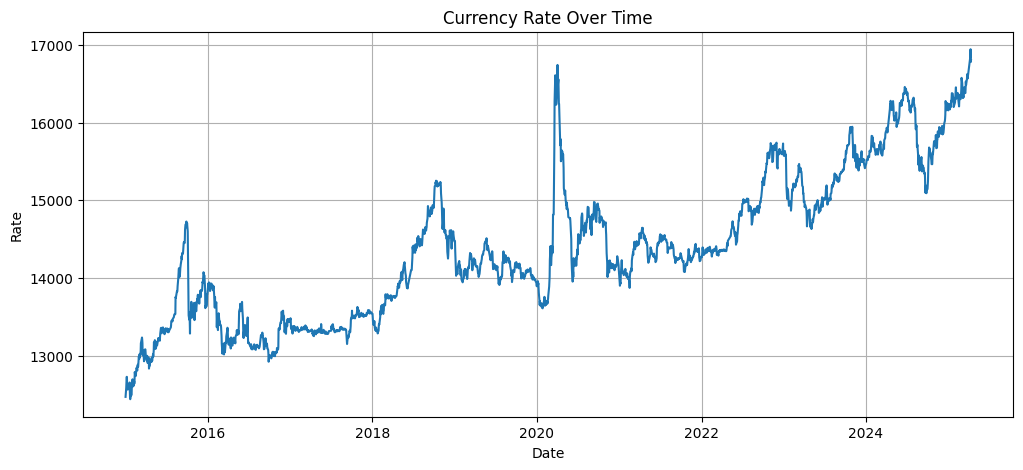

In [13]:
# Plot the currency rate
plt.figure(figsize=(12, 5))
plt.plot(df['Rate'])
plt.title("Currency Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.grid()
plt.show()

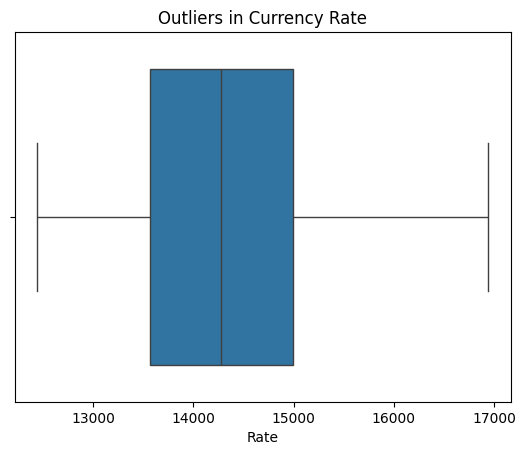

In [14]:
# Boxplot for outliers
import seaborn as sns
sns.boxplot(x=df['Rate'])
plt.title("Outliers in Currency Rate")
plt.show()

In [15]:
# to Normalise the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Rate']])

In [16]:
# Create sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled, time_steps)


In [17]:
# Split into train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [18]:
# Reshape the input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [19]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ssush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0632 - val_loss: 0.0043
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 7.8137e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 8.6080e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0767e-04 - val_loss: 8.3584e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3586e-04 - val_loss: 5.8017e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 5.4299e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8631e-04 - val_loss: 6.4415e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3065e-04 - val_loss: 7.3442e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8333e-04 - val_loss: 0.0010
Epoch 12/20
62/62 ━━━━━━━━

In [21]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8476e-04 
Test Loss: 0.0005847871652804315


In [22]:
#predict
predictions = model.predict(X_test)
predicted_rates = scaler.inverse_transform(predictions)
actual_rates = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


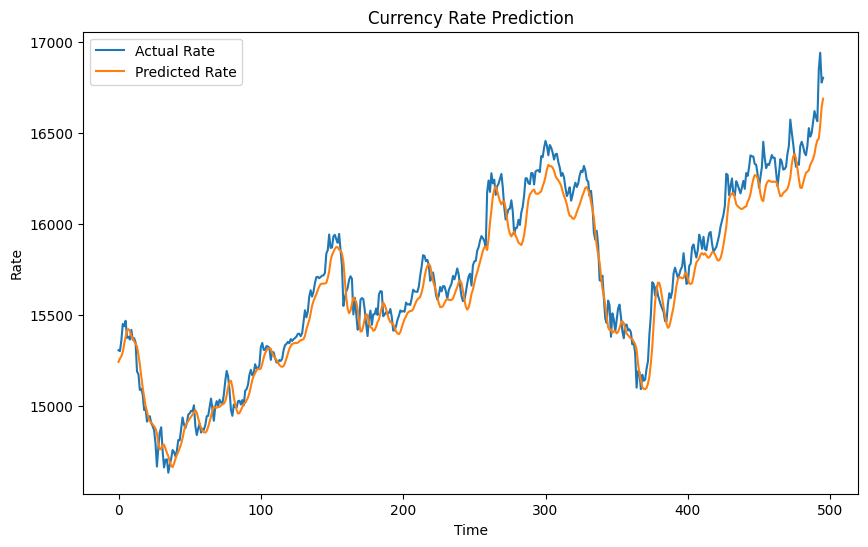

In [23]:
# Plot of predicted and Actual
plt.figure(figsize=(10, 6))
plt.plot(actual_rates, label='Actual Rate')
plt.plot(predicted_rates, label='Predicted Rate')
plt.title("Currency Rate Prediction")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.legend()
plt.show()

In [28]:
rmse = np.sqrt(mean_squared_error(actual_rates, predicted_rates))
mape = mean_absolute_percentage_error(actual_rates, predicted_rates)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.2%}")

Root Mean Squared Error: 108.7966
Mean Absolute Percentage Error: 0.55%


In [32]:
accuracy = 100 - (mape * 100)
print(f" Accuracy: {accuracy:.2f}%")


 Accuracy: 99.45%
